In [62]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

5 [0, 50, 90, 6, 62]
5 [50, 0, 1, 54, 65]
5 [90, 1, 0, 83, 23]
5 [6, 54, 83, 0, 33]
5 [62, 65, 23, 33, 0]
Tour for Brute Force: [0, 1, 2, 4, 3] (Cost: 113)
Tour for Approximation: [0, 3, 4, 2, 1] (Cost: 113)
Tour for Simulated Annealing: [3, 0, 1, 2, 4] (Cost: 113)
7 [0, 66, 26, 10, 99, 64, 29]
7 [66, 0, 41, 32, 3, 66, 9]
7 [26, 41, 0, 10, 57, 51, 74]
7 [10, 32, 10, 0, 98, 89, 37]
7 [99, 3, 57, 98, 0, 20, 11]
7 [64, 66, 51, 89, 20, 0, 25]
7 [29, 9, 74, 37, 11, 25, 0]
Tour for Brute Force: [0, 3, 2, 5, 4, 1, 6] (Cost: 132)
Tour for Approximation: [0, 3, 2, 6, 1, 4, 5] (Cost: 190)
Tour for Simulated Annealing: [4, 5, 2, 3, 0, 6, 1] (Cost: 132)
9 [0, 96, 59, 23, 11, 14, 92, 43, 30]
9 [96, 0, 11, 82, 39, 99, 18, 92, 50]
9 [59, 11, 0, 54, 82, 40, 87, 14, 40]
9 [23, 82, 54, 0, 73, 39, 50, 99, 75]
9 [11, 39, 82, 73, 0, 38, 48, 2, 39]
9 [14, 99, 40, 39, 38, 0, 78, 39, 53]
9 [92, 18, 87, 50, 48, 78, 0, 3, 40]
9 [43, 92, 14, 99, 2, 39, 3, 0, 43]
9 [30, 50, 40, 75, 39, 53, 40, 43, 0]
Tour for Bru

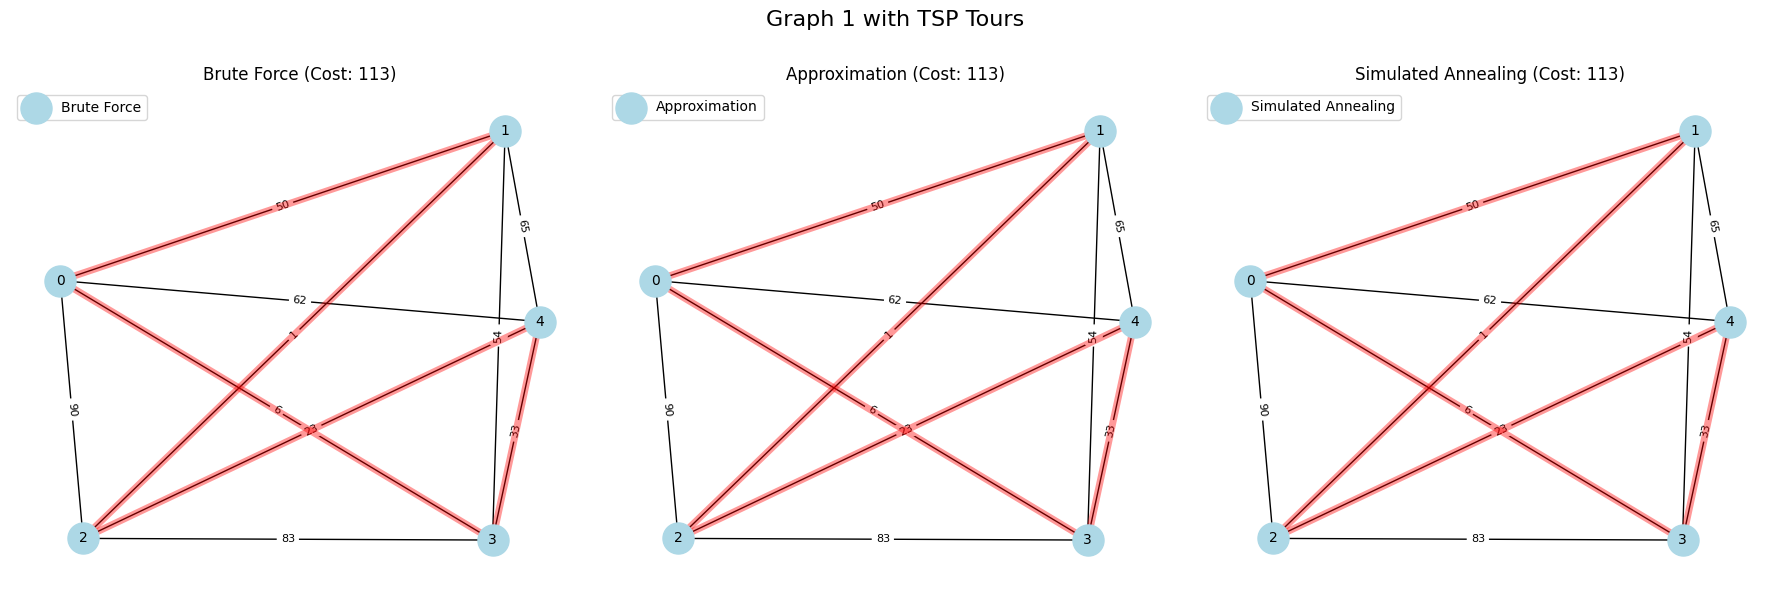

Plotting tour for Brute Force: [(0, 3), (3, 2), (2, 5), (5, 4), (4, 1), (1, 6), (6, 0)]
Plotting tour for Approximation: [(0, 3), (3, 2), (2, 6), (6, 1), (1, 4), (4, 5), (5, 0)]
Plotting tour for Simulated Annealing: [(4, 5), (5, 2), (2, 3), (3, 0), (0, 6), (6, 1), (1, 4)]


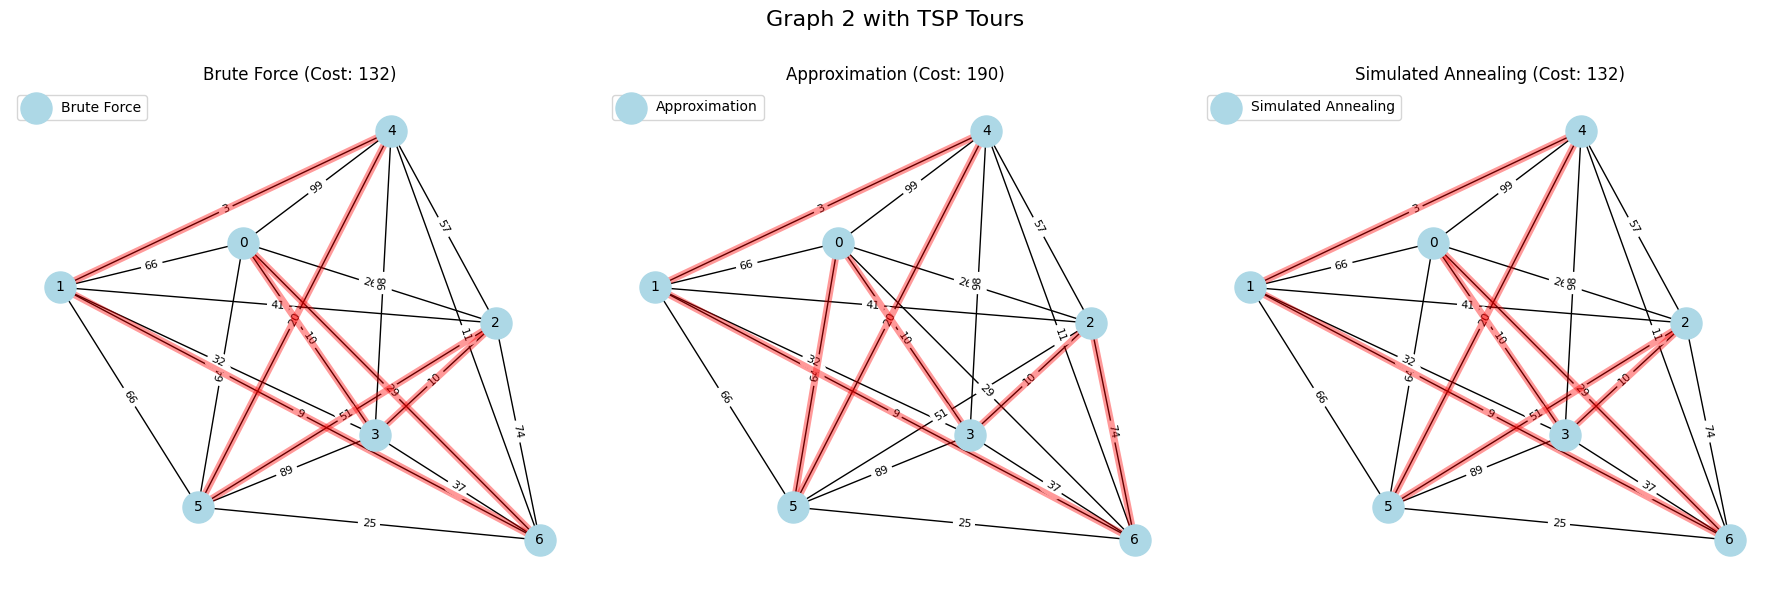

Plotting tour for Brute Force: [(0, 3), (3, 5), (5, 8), (8, 2), (2, 1), (1, 6), (6, 7), (7, 4), (4, 0)]
Plotting tour for Approximation: [(0, 3), (3, 4), (4, 7), (7, 2), (2, 1), (1, 6), (6, 5), (5, 8), (8, 0)]
Plotting tour for Simulated Annealing: [(5, 8), (8, 2), (2, 1), (1, 6), (6, 7), (7, 4), (4, 0), (0, 3), (3, 5)]


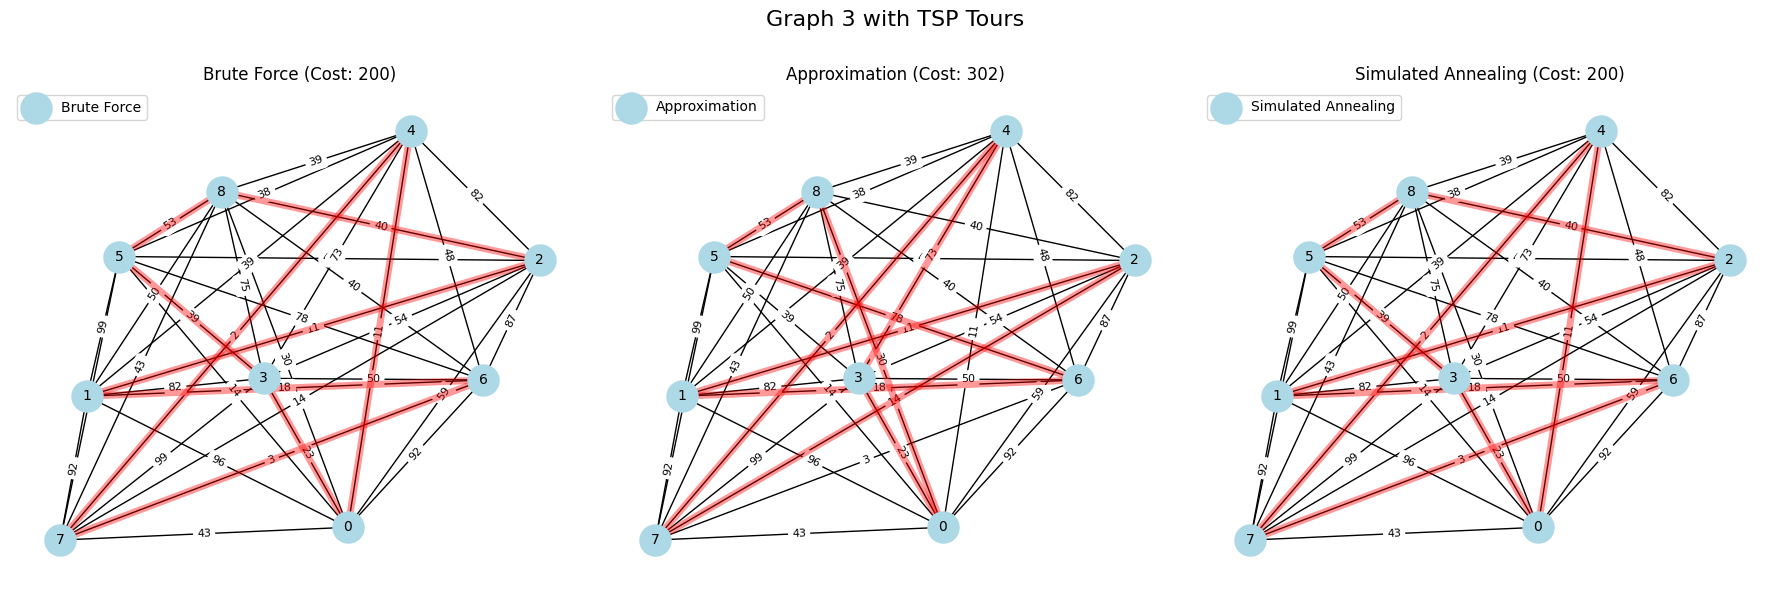

Plotting tour for Brute Force: [(0, 4), (4, 9), (9, 1), (1, 8), (8, 6), (6, 7), (7, 3), (3, 10), (10, 2), (2, 5), (5, 0)]
Plotting tour for Approximation: [(0, 3), (3, 4), (4, 5), (5, 2), (2, 10), (10, 6), (6, 7), (7, 8), (8, 1), (1, 9), (9, 0)]
Plotting tour for Simulated Annealing: [(4, 3), (3, 7), (7, 2), (2, 10), (10, 5), (5, 6), (6, 8), (8, 1), (1, 9), (9, 0), (0, 4)]


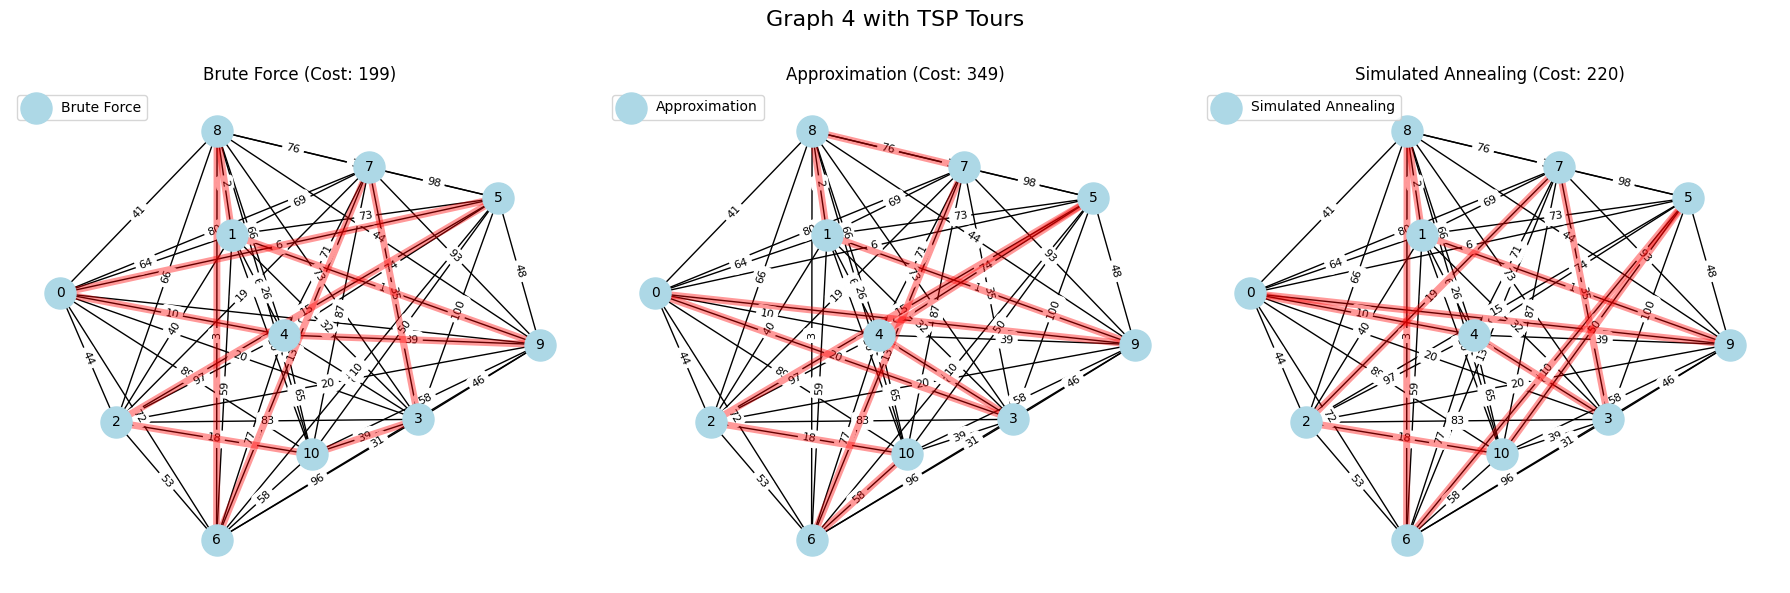

No path solution found for the given graph using Brute Force algorithm.
No path solution found for the given graph using Approximation algorithm.
No path solution found for the given graph using Simulated Annealing algorithm.


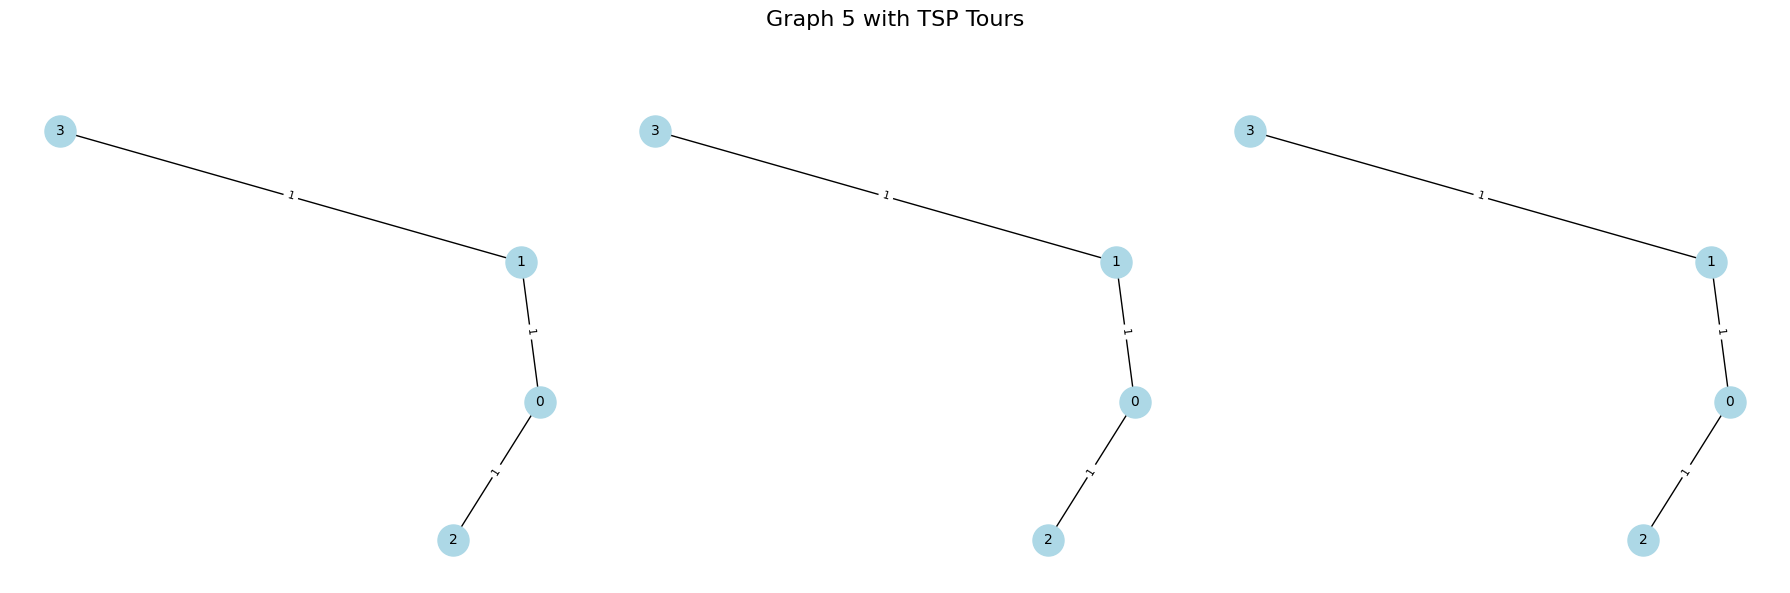

In [110]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_graph_and_tours(adjacency_matrix, tours, graph_num):
    """Visualizes the graph and the tours with tour edges colored green."""
    num_vertices = len(adjacency_matrix)
    G = nx.Graph()

    # Add edges to the graph with weights
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and adjacency_matrix[i][j] != 0 and adjacency_matrix[i][j]!=1000000:
                G.add_edge(i, j, weight=adjacency_matrix[i][j])

    # Use spring_layout to avoid straight-line alignments with some jitter
    pos = nx.spring_layout(G, seed=42, k=0.3, iterations=50)  # Adding 'k' for node repulsion

    # Add slight random jitter to positions to avoid perfect alignment
    jitter = 0.05  # Jitter factor, adjust as needed
    for node in pos:
        pos[node] += np.random.uniform(-jitter, jitter, size=2)

    # Create a subplot with 3 columns for each tour
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Graph {graph_num} with TSP Tours", fontsize=16)

    # Ensure that Brute Force, Approximation, and Simulated Annealing are plotted in the correct order
    tour_order = ["Brute Force", "Approximation", "Simulated Annealing"]
    
    for ax, algorithm in zip(axes, tour_order):
        # Extract the tour and cost for each algorithm
        tour, cost = tours.get(algorithm, ([], 0))  # Default to empty if algorithm not found

        # Debug: Check if tour data is found for the algorithm
        if not tour:
            print(f"No tour data found for {algorithm} in Graph {graph_num}. Skipping plot for this algorithm.")
        
        # Plot the graph itself (nodes and edges)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, ax=ax)
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()},
            font_size=8, ax=ax
        )
        
        # Plot the specific tour's edges in green
        if tour:  # Ensure there's a tour to plot
            # Ensure nodes are valid (check that node indices are within range)
            if(cost==-1):
                print(f"No path solution found for the given graph using {algorithm} algorithm.")
                continue
            valid_tour = [node for node in tour if node < num_vertices]
            if len(valid_tour) != len(tour):
                print(f"Warning: Some nodes in the tour {algorithm} are invalid and will be ignored.")
            
            # Create edges from the valid tour nodes
            edges = [(valid_tour[i], valid_tour[i + 1]) for i in range(len(valid_tour) - 1)] + [(valid_tour[-1], valid_tour[0])]

            # Debug: Print the edges of the tour
            print(f"Plotting tour for {algorithm}: {edges}")
            
            # Plot the edges of the current tour in green
            nx.draw_networkx_edges(
                G, pos,
                edgelist=edges,
                edge_color='red', 
                alpha=0.4, # Color tour edges green
                width=5,
                ax=ax
            )

        # Set the title for each subplot
        ax.set_title(f"{algorithm} (Cost: {cost})")
        ax.legend([algorithm], loc="upper left")
        ax.axis('off')  # Hide the axes for a cleaner look

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

def parse_input_from_file(filename):
    """Parses the input data from a file and extracts adjacency matrices and tours."""
    with open(filename, 'r') as file:
        lines = file.readlines()

    graphs = []
    i = 0
    while i < len(lines):
        line = lines[i].strip()  # Clean the current line
        if line.startswith("Graph Adjacency Matrix"):
            # Parse adjacency matrix size (number of vertices)
            size_line = lines[i].strip()
            size = int(size_line.split('(')[1].split(' ')[0])
            
            # Parse adjacency matrix
            adjacency_matrix = []
            i += 1  # Move to the next line after "Graph Adjacency Matrix"
            for _ in range(size):
                row = list(map(int, lines[i].strip().split()))
                if len(row) == size:
                    adjacency_matrix.append(row)
                else:
                    print(f"Warning: Inconsistent row length found: {row}")
                i+=1
            
            # Debugging: Check if all rows are the same length
            for row in adjacency_matrix:
                print(len(row), row)
                
            # Parse tours
            tours = {}
            i += 1  # Move to the next line after the matrix
            while i < len(lines):
                line = lines[i].strip()
                if line.startswith("Brute Force Tour"):
                    algorithm = "Brute Force"
                elif line.startswith("Approximation TSP Tour"):
                    algorithm = "Approximation"
                elif line.startswith("Simulated Annealing Tour"):
                    algorithm = "Simulated Annealing"
                elif not line:  # Skip empty lines
                    i += 1
                    continue  # No more tours
                else:
                    break  # If line doesn't match any tour, stop processing
                
                # Parse cost
                cost_start = line.find("(Cost:") + len("(Cost:")
                cost_end = line.find(")")
                cost = int(line[cost_start:cost_end].strip())

                # Parse the tour
                i += 1  # Move to the next line for the actual tour
                if i < len(lines):
                    tour_line = lines[i].strip()
                    if tour_line:
                        tour = list(map(int, tour_line.split()))
                        tours[algorithm] = (tour, cost)
                        print(f"Tour for {algorithm}: {tour} (Cost: {cost})")
                i += 1  # Move to the next line after parsing the tour

            # Convert to NumPy array and append to the graphs list
            try:
                graphs.append((np.array(adjacency_matrix), tours))
            except ValueError as e:
                print(f"Error in adjacency matrix: {e}")
                print(f"Inconsistent matrix: {adjacency_matrix}")
        else:
            i += 1  # Skip non-relevant lines

    return graphs


# Read input data from "results.txt" and visualize
input_file = "results.txt"
graphs = parse_input_from_file(input_file)

# Debug: Check if graphs were parsed
if not graphs:
    print("No graphs were parsed. Check the input file format.")

# Proceed with plotting if graphs were parsed
for graph_num, (adjacency_matrix, tours) in enumerate(graphs, start=1):
    plot_graph_and_tours(adjacency_matrix, tours, graph_num)
